# Nb keywords

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Analyse des occurrences cumulées

In [2]:
# import des data
df_authors_cumule = pd.read_csv("../csv/occurrences_long_cumulees_keywordsauthor.csv") # genere à partir des scripts 1 et keyword_x_year
df_authors_cumule = df_authors_cumule.iloc[:,1:df_authors_cumule.shape[1]] # on enlève la 1ere colonne
df_authors_cumule = df_authors_cumule.iloc[5:df_authors_cumule.shape[0],:] # on enlève les 5 première lignes, peu instructives
# on met la premiere colonne en étiquettes
df_authors_cumule = df_authors_cumule.set_index("Keyword")
df_authors_cumule= df_authors_cumule.astype(int)# on convertit tout en nombres
df_authors_cumule.head()

,1903,1946,1948,1951,1956,1957,1964,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Keyword,,,,,,,,,,,,,,,,,,,,,
FATIGUE,0,0,0,0,0,1,1,1,1,1,...,45,75,111,153,187,231,272,338,394,434
DEPRESSION,0,0,0,0,0,0,0,0,0,0,...,31,54,91,125,167,206,256,321,373,412
NARCOLEPSY,0,0,0,0,0,0,0,0,0,0,...,58,86,115,148,184,222,269,329,369,403
DAYTIME SLEEPINESS,0,0,0,0,0,0,0,0,0,0,...,37,60,97,125,163,208,248,298,347,392
POLYSOMNOGRAPHY,0,0,0,0,0,0,0,0,0,0,...,43,64,97,136,172,213,245,292,330,364


In [3]:
df_res = pd.DataFrame(columns=df_authors_cumule.columns)

In [4]:
df_res.loc['Authors\' Keywords ',:] = (df_authors_cumule>=1).sum(axis = 0)

In [5]:
# import des data
df_plus_cumule = pd.read_csv("../csv/occurrences_long_cumulees_keywordsplus.csv") # genere à partir des scripts 1 et keyword_x_year
df_plus_cumule = df_plus_cumule.iloc[:,1:df_plus_cumule.shape[1]] # on enlève la 1ere colonne
df_plus_cumule = df_plus_cumule.iloc[5:df_plus_cumule.shape[0],:] # on enlève les 5 première lignes, peu instructives
# on met la premiere colonne en étiquettes
df_plus_cumule = df_plus_cumule.set_index("Keyword")
df_plus_cumule= df_plus_cumule.astype(int)# on convertit tout en nombres
df_plus_cumule.head()

,1903,1946,1948,1951,1956,1957,1964,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Keyword,,,,,,,,,,,,,,,,,,,,,
AGED,0,0,0,0,0,0,0,0,0,0,...,2584,2798,3023,3243,3471,3680,3858,3951,4009,4009
SLEEP,0,0,0,0,0,0,0,0,0,1,...,1963,2161,2355,2608,2833,3071,3394,3715,3941,3946
SLEEP APNEA OBSTRUCTIVE,0,0,0,0,0,0,0,0,0,0,...,1914,2110,2327,2553,2792,3009,3236,3438,3595,3596
POLYSOMNOGRAPHY,0,0,0,0,0,0,0,0,0,0,...,2337,2524,2712,2889,3091,3254,3396,3495,3556,3558
SURVEYS AND QUESTIONNAIRES,0,0,0,0,0,0,0,0,0,0,...,1929,2092,2293,2516,2722,2895,3075,3230,3316,3317


In [6]:
df_res.loc['Keywords +',:] = (df_plus_cumule>=1).sum(axis = 0)

### Plot 

In [7]:
# on change la dimension du dataset pour mettre les années en colonne
df_melted = pd.melt(df_res.reset_index(names='Type of keyword'), id_vars = 'Type of keyword', var_name = "Year", value_name='Nb')
df_melted.Year = df_melted.Year.astype(int) 
df_melted.head()

,Type of keyword,Year,Nb
0,Authors' Keywords,1903,0
1,Keywords +,1903,0
2,Authors' Keywords,1946,3
3,Keywords +,1946,8
4,Authors' Keywords,1948,5


In [8]:
# on enlève toutes les données avant la première apparition des keywords
df_melted = df_melted[df_melted.Year>=1946]

c:\Users\Vincent\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\Vincent\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


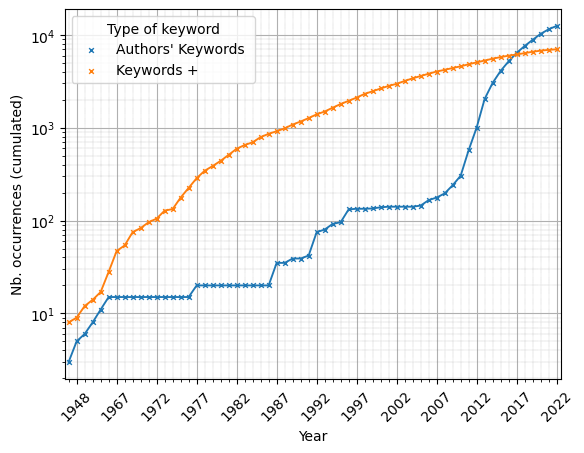

In [9]:
fig, ax = plt.subplots()
#plt.figure(figsize=(8,5))

g = sns.pointplot(data=df_melted, x="Year", y="Nb", hue = "Type of keyword", markers = "x",scale = 0.5)
plt.yscale('log')
years = np.unique(df_melted.Year)
ticks = list(np.arange(1,len(years),5))
g.set_xticks(ticks)
g.set_xticklabels(years[ticks])
plt.xticks(rotation=45)
plt.ylabel("Nb. occurrences (cumulated)")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.3', color='grey')
plt.grid() 
plt.show()


# Analyse des données par année (nombre de nouveaux mots-clés chaque année)

In [10]:
df_dif = df_res.copy()

In [11]:
df_res

,1903,1946,1948,1951,1956,1957,1964,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Authors' Keywords,0,3,5,6,8,11,15,15,15,15,...,2044,3042,4099,5196,6406,7596,8849,10265,11499,12499
Keywords +,0,8,9,12,14,17,28,47,54,75,...,5298,5544,5770,5973,6157,6365,6587,6766,6900,6996


In [12]:
for i in range(1,df_res.shape[1]) :
    df_dif.iloc[0,i] = df_res.iloc[0,i] - df_res.iloc[0,i-1]
    df_dif.iloc[1,i] = df_res.iloc[1,i] - df_res.iloc[1,i-1]

In [13]:
df_dif

,1903,1946,1948,1951,1956,1957,1964,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Authors' Keywords,0,3,2,1,2,3,4,0,0,0,...,1040,998,1057,1097,1210,1190,1253,1416,1234,1000
Keywords +,0,8,1,3,2,3,11,19,7,21,...,235,246,226,203,184,208,222,179,134,96


### Plot 

In [14]:
# on change la dimension du dataset pour mettre les années en colonne
df_melted = pd.melt(df_dif.reset_index(names='Type of keyword'), id_vars = 'Type of keyword', var_name = "Year", value_name='Nb')
df_melted.Year = df_melted.Year.astype(int) 
df_melted.head()

,Type of keyword,Year,Nb
0,Authors' Keywords,1903,0
1,Keywords +,1903,0
2,Authors' Keywords,1946,3
3,Keywords +,1946,8
4,Authors' Keywords,1948,2


In [15]:
# on enlève toutes les données avant la première apparition des keywords
df_melted = df_melted[df_melted.Year>=1946]

c:\Users\Vincent\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\Vincent\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


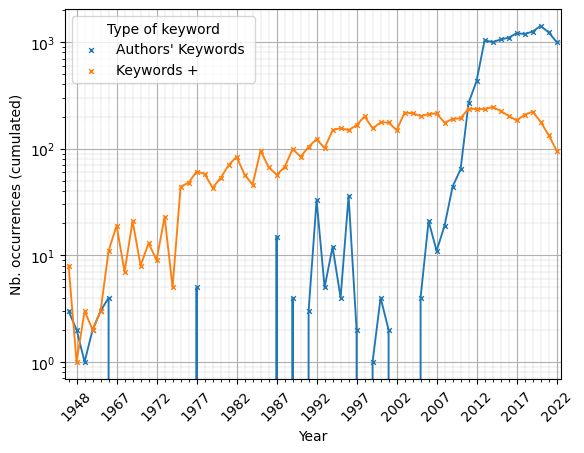

In [16]:
fig, ax = plt.subplots()
#plt.figure(figsize=(8,5))

g = sns.pointplot(data=df_melted, x="Year", y="Nb", hue = "Type of keyword", markers = "x",scale = 0.5)
plt.yscale('log')
years = np.unique(df_melted.Year)
ticks = list(np.arange(1,len(years),5))
g.set_xticks(ticks)
g.set_xticklabels(years[ticks])
plt.xticks(rotation=45)
plt.ylabel("Nb. occurrences (cumulated)")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.3', color='grey')
plt.grid() 
plt.show()
